## Project 2 - Gradient Descent (IRIS)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_iris

In [2]:
iris = load_iris() #Loading the diabetes dataset
data = iris.data 
target = iris.target
length = len(iris.feature_names)
N = len(target)
unique_N = len(np.unique(target))

#one hot
onehot = np.zeros((N,unique_N))
for i in range(N):
    j = target[i]
    onehot[i,j]=1
#unique_N

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data,onehot, test_size=0.2)

In [4]:
d = X_train.shape[1] #for beta d+1
X_train =(X_train - np.mean(X_train,axis = 0))/ np.std(X_train,axis=0)
X_test = (X_test - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)

In [5]:
#augmented
X_train = np.insert(X_train, 0,1, axis =1)
#X_train
X_test = np.insert(X_test, 0,1, axis =1)
#X_test

In [6]:
def softmax_function(k):
    return np.exp(k) / np.sum(np.exp(k),axis=0)

def cross_entropy_multi(p,q):
    return -np.vdot(p,np.log(q))

def L(beta,X,y):
    N = X.shape[0]
    out = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        yi_pred = softmax_function(beta@xiHat) #s(u)
        out += cross_entropy_multi(yi,yi_pred)
    return out / N

def L_grad(beta,X,y):
    N=X.shape[0]
    grad =0 
    for i in range(N):
        Xi_hat = X[i]
        yi = y[i]
        yi_pred = softmax_function(beta@Xi_hat) #s(u)
        grad = grad+np.outer((yi_pred - yi ), Xi_hat)
        
    return grad/N

In [7]:
def grad_descent(X,y):
    num_iters = 1000
    alpha = 0.05
    beta = np.zeros((unique_N,d+1))
    
    L_vals = np.zeros(num_iters)
    for t in range(num_iters):
        L_vals[t] = L(beta,X,y)
        
        #print('Iterations :',t,'objective function values : ', L_vals[t])
            
        beta = beta - alpha * L_grad(beta,X,y)
    
    return beta, L_vals

In [8]:
beta, L_vals = grad_descent(X_train,y_train)

In [9]:
#beta
#L_vals

Text(0, 0.5, 'Values of Objective Function')

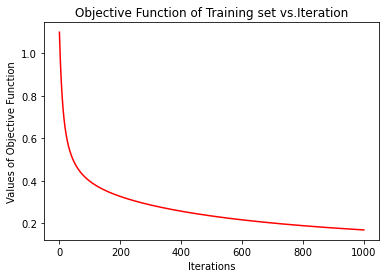

In [10]:
plt.plot(L_vals, color= "red")
plt.title("Objective Function of Training set vs.Iteration")
plt.xlabel('Iterations')
plt.ylabel('Values of Objective Function')

In [11]:
beta1, L_vals1 = grad_descent(X_test,y_test)

Text(0, 0.5, 'Values of Objective Function')

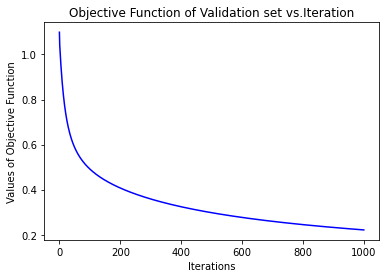

In [12]:
plt.plot(L_vals1, color= "blue")
plt.title("Objective Function of Validation set vs.Iteration")
plt.xlabel('Iterations')
plt.ylabel('Values of Objective Function')

In [13]:
def prediction_function(beta,X):
    N = X.shape[0]
    y_pred = []
    
    for i in range(N):
        xiHat = X[i]
        yi_pred = softmax_function(beta @ xiHat)
        out = np.argmax(yi_pred)
        y_pred.append(out)
           
    return np.round(y_pred)

In [14]:
prediction_function(beta,X_test)

array([2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2])